In [5]:
! git clone https://github.com/ds4e/knn



fatal: destination path 'knn' already exists and is not an empty directory.


## Computer Vision

Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

In [6]:
from keras.datasets import mnist
df = mnist.load_data('mnist.db')
train,test = df
X_train, y_train = train
X_test, y_test = test

7 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 19

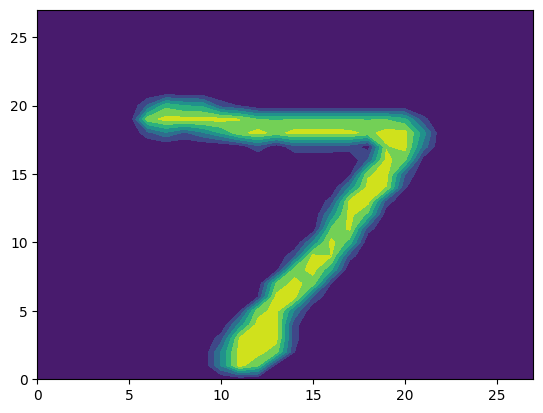

2 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   

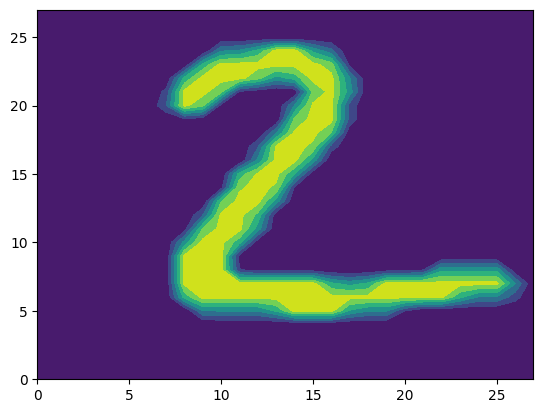

1 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254 109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252  82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  84 254  63   

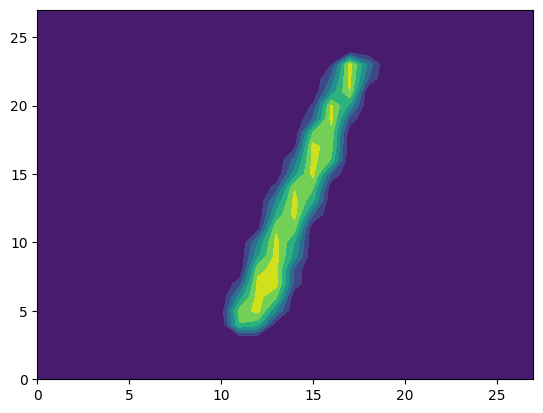

0 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 150 253 202  31   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21 197 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 110 190 251 251 251 253 169 109  62   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 253 251 251 251 251 253 251 251 22

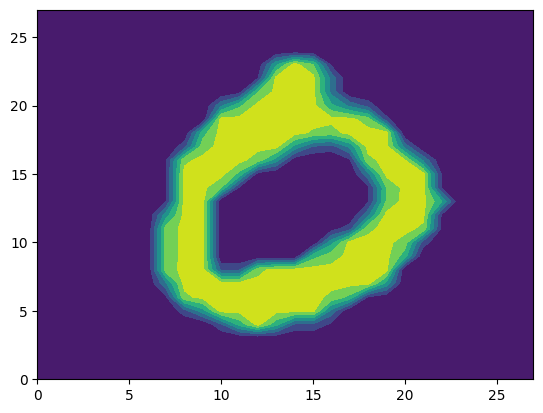

4 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  50 224   0   0   0   0   0   0   0  70  29   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 121 231   0   0   0   0   0   0   0 148 168   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4 195 231   0   0   0   0   0   0   0  96 210  11   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  69 252 134   0   0   0   0   0   0   

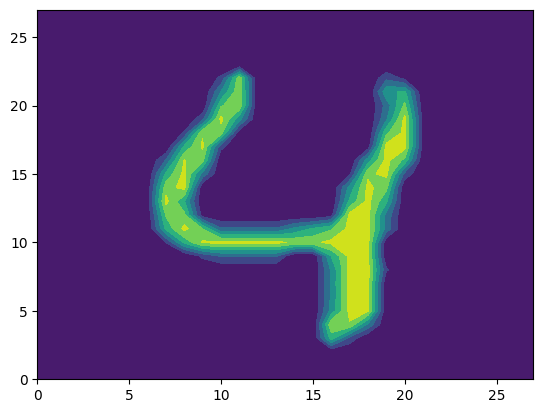

In [7]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
 print(y_test[i],'\n') # Print the label
 print(X_test[i],'\n') # Print the matrix of values
 plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
 plt.show()

What is the shape of X_train and X_test? What is the shape of X_train[i] and X_test[i] for each index i? What is the shape of y_train and y_test?

In [8]:
import pandas as pd

In [9]:
# Finding shapes of the X/ Y test and train
data = {
    "Train": ["X_train shape", "X_train[2] shape", "y_train shape",],
    "Test": ["X_test shape","X_test[2] shape", "y_test.shape"],
    "Shape Train": [X_train.shape, X_train[2].shape,  y_train.shape],
    "Shape Test": [X_test.shape, X_test[2].shape, y_test.shape]

}

df = pd.DataFrame(data)

df

,Train,Test,Shape Train,Shape Test
0,X_train shape,X_test shape,"(60000, 28, 28)","(10000, 28, 28)"
1,X_train[2] shape,X_test[2] shape,"(28, 28)","(28, 28)"
2,y_train shape,y_test.shape,"(60000,)","(10000,)"


Use Numpy's .reshape() method to covert the training and testing data from a matrix into an vector of features. So, X_test[index].reshape((1,784)) will convert the  index -th element of X_test into a  28×28=784 -length row vector of values, rather than a matrix. Turn X_train into an  N×784  matrix  X  that is suitable for scikit-learn's kNN classifier where  N  is the number of observations and  784=28∗28  (you could use, for example, a for loop).

In [10]:
import pandas as pd
import numpy as np


# KEPT SAME FORMAT, BUT USED CHATGTP TO HELP MAKE CODE EFFICENT
#To save on reloading cost, I save the reshaped data and reload it rather than run the
# code that loops over appending the rows

reload = 0 # Control the way data loads

if reload == 1:
    # Reshape entire dataset at once (MUCH faster)
    Z_train = pd.DataFrame(X_train.reshape(X_train.shape[0], 784))
    Z_train.to_csv('knn/lab/data/Z_train.csv', index=False)

    Z_test = pd.DataFrame(X_test.reshape(X_test.shape[0], 784))
    Z_test.to_csv('knn/lab/data/Z_test.csv', index=False)


else: # If reload is not 1, just load the reshaped data
    Z_train = pd.read_csv('knn/lab/data/Z_train.csv')
    Z_test = pd.read_csv('knn/lab/data/Z_test.csv')

Use the reshaped X_test and y_test data to create a  k -nearest neighbor classifier of digit. What is the optimal number of neighbors  k ? If you can't determine this, play around with different values of  k  for your classifier.

Current k:  1
Current k:  2
Current k:  3
Current k:  4
Current k:  5
Current k:  6
Current k:  7
Current k:  8
Current k:  9
Current k:  10
Current k:  11
Current k:  12
Current k:  13
Current k:  14
Current k:  15
[3]


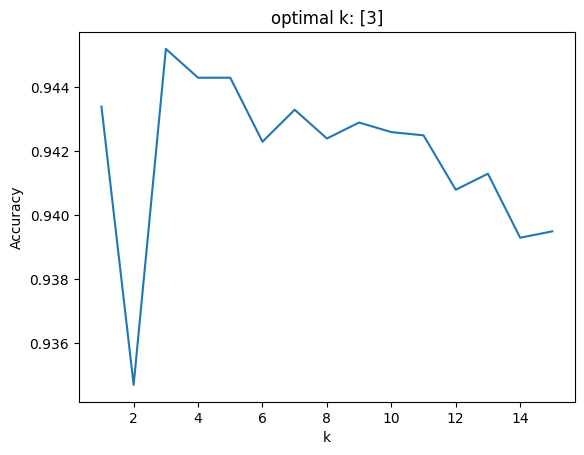

In [14]:
# Importing necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import sklearn.model_selection as model_selection
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

#THIS CODE WAS ADPATED FROM THE ANSWERKEY, BUT SOME KEY CHANGES INCLUDE Standardization, and trying out 15 k values

#This Loads the previous data from the csv we saved ( so we don't need to keep running the orginial data)
Z_train = pd.read_csv('knn/lab/data/Z_train.csv')
Z_test = pd.read_csv('knn/lab/data/Z_test.csv')

#We are standardizing the Z_train and Z_test we got from the csv file
# We are usin the module/functions from the sklearn package
std= StandardScaler()
Z_train_scale = std.fit_transform(Z_train)
Z_test_scale = std.transform(Z_test)


# Determine the optimal k:
k_bar = 15 # this initates different value of k ( to try out)
accuracy = [] # this collects the y-values we are going to graph ( these are "measures of how well your model is predicting the correct labels on the test set")

for k in range(k_bar):
    print('Current k: ' , str(k+1))
    knn = KNeighborsClassifier(n_neighbors=k+1) # Create classifier instance
    predictor = knn.fit(Z_train_scale,y_train) # Fit model
    accuracy.append( predictor.score(Z_test_scale,y_test) ) # collects/ aggregates the accuracy values from each k value


#THESE NEXT CHUNKS ARE NOT IN FOR LOOP

accuracy_max = np.max(accuracy) # highest accuracy obsevred from the loop
max_index = np.where(accuracy==accuracy_max)[0] # this pulls out the first value from the accurcay stroage variable that is the maximum
k_star = max_index+1 # Find the optimal value of k
print(k_star) # prints the optimal k ( highest accuracy value)


# This plots the graph
plt.plot(np.arange(1,k_bar+1),accuracy) # Plot accuracy by k
plt.xlabel("k")
plt.title("optimal k: "+str(k_star))
plt.ylabel('Accuracy')
plt.show()

Some things I noticed were from this graph was
1. It looks like there was a massive drop in accuracy at k=2, but it started increasing dramatically --> peaked at k=3 ( which was out optimal k val)

2. We can see that the general trend of accuracy after k=3 was reached began decreasing ( indicating overfitting)

For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.

In [17]:
knn = KNeighborsClassifier(n_neighbors=3) #This creates a kNN classifier object ( 3 is the optimial k val)- number of nearest neighbors
predictor = knn.fit(Z_train_scale,y_train) # This trains the kNN model ( fitting the training data and correspoind y_train label)
y_hat = predictor.predict(Z_test_scale) ## this uses the trained model to make predictions on the test data

accuracy = knn.score(Z_test_scale,y_test)  # .score compares the predicited labels to the actual observed labels ( returns the ration of correct classified)
print('Accuracy: ', accuracy)

pd.crosstab(y_test, y_hat) # this creates the confusion matrix

Accuracy:  0.9452


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,967,0,1,3,0,4,5,0,0,0
1,0,1127,3,0,1,0,3,0,1,0
2,12,9,967,15,2,0,5,11,9,2
3,0,4,5,963,2,14,0,12,8,2
4,1,9,5,2,922,2,7,4,3,27
5,7,0,6,21,4,828,9,2,7,8
6,13,4,2,0,3,9,925,0,2,0
7,0,22,12,4,7,2,0,953,1,27
8,15,3,9,24,10,22,3,7,874,7


Confusion matrix: tell sus how often the mdeol gets stuff right vs mistakes

*Numbers in each cell represents the amount of times that row digit was classified as something else in the other column.

Observations

1. With k=3, the accuracy is about 95% on the test set.
2. The diagonals represent where the predicted label matches the actual label ( which makes sense why (0,0) , (1,1), (2,2), etc... seem to to have very high values

3. However, we can also look at high value in mis-matched columns/rows ( for example, 8 and 3, and 4 and 9 seem to have high values in the cell but they aren't matching.


For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?


Some mistakes that are most likely are
1. (4,9)- 27
2. (5,3) - 21
3. (7,1)-22 and (7,9)-27
4. (8,3) - 24

I see a pattern that these numbers seem to have similar styles/features that similar to eachother. For example, the 8 and 3 seem to both have loops, 7 and 1 are really similar in writing the small tick on the top really makes a difference

So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

This is a very interesting application to the lab we've done so far. I just made a connection to green-screens ( which essential use similar algorithm). However, we could think of this as having the brightness/ similar color codes of RBG ( this being the basis/refrence). The we could have three matrices and use the color codes/ brightness assoicated with color codes to differentiate ( like Red and blue would be considred darker and can have different brightneess)